##  PREDICTIVE MODEL FOR PROACTIVE LAYER FEED EFFICIENCY USING RANDOM FOREST REGRESSOR
A predictive model is a type of  machine learning model used to analyze historical data and make future predictions based on patterns and relationships in the data. It learns from past observations and applies this knowledge to forecast unknown outcomes.The goal is to develop a regression model to predict feed conversion ratio from past data, enabling proactive management choices.
A predictive model will analyze feeding patterns, intake behavior, and other poultry-related metrics to estimate feed efficiency (FCR), enabling proactive decision-making in layer hen management. The Random Forest Regressor (RFR) will be used to enhance prediction accuracy by leveraging multiple decision trees to capture complex relationships within the dataset.
<div class="alert alert-success" role="alert">
    <h3>Processes to be undertaken;</h3>
    <ul>
        <li>Import necessary libraries</li>
        <li>Load the various datasets and merge them together</li>
        <li>Explore the merged dataset</li>
        <li>Build the model</li>
        <li>Deploy the model using flask web to test the application</li
    </ul>
</div>

# 1. Importing Necessary Libraries
To perform data analysis, visualization, and machine learning, the study import several libraries. Below is a brief explanation of each libraries employed:
- **Pandas (`pd`)**: Used for data manipulation and analysis, providing powerful data structures like DataFrames.
- **NumPy (`np`)**: Supports numerical computations, including arrays, matrices, and mathematical operations.
- **Matplotlib (`plt`)**: A plotting library for creating static and interactive visualizations.
- **Seaborn (`sns`)**: Built on Matplotlib, it provides enhanced statistical visualizations like heatmaps and box plots.
- **Warnings (`warnings`)**: Helps manage warning messages; we suppress them to keep outputs clean.
- **Plotly (`px`, `go`, `pio`)**: A library for interactive visualizations:
- **pio.templates.default** : Set visualization style to white
  - `plotly.express (px)`: High-level interface for simple plots.
  - `plotly.graph_objects (go)`: More customizable plotting functions.
  - `plotly.io (pio)`: Manages input/output configurations for Plotly.
- **Scikit-learn (`sklearn`)**: A machine learning library offering tools for model training, evaluation, and preprocessing:
  - `mean_absolute_error, r2_score`: Metrics for evaluating regression models.
  - `Ridge`: A regularized linear regression model.
  - `RandomForestRegressor`: An ensemble model for regression tasks.
  - `train_test_split`: Splits data into training and testing sets for model evaluation.


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from flask import Flask, request, jsonify
import joblib


# 2. Loading Datasets into DataFrames  
The study make use of multiple datasets related to feed efficiency in egg production. Each dataset contains specific information that will be merged for further analysis.
Before merging the datasets, the study loads the various datasets into **pandas dataframes** . This allows for data structuring in a tabular format, making it easier to analyze and manipulate.  


In [162]:
df_FCR = pd.read_csv("C:/PROJECT4.2/Datasets/FCR.csv")  
df_feeding_behaviours = pd.read_csv("C:/PROJECT4.2/Datasets/Feeding_behaviors.csv")
df_chemical_composition_of_feeds = pd.read_csv("C:/PROJECT4.2/Datasets/Chemical composition of remaining diet.csv")
display(df_FCR.head())
display(df_feeding_behaviours.head())
display(df_chemical_composition_of_feeds.head())

,Bird ID.,Total feed intake (g),ADI (g),Total egg wt (g),FCR
0,R3B31,823.0,117.571429,449.0,1.832962
1,R3B47,791.0,113.000000,463.0,1.708423
2,R3B5,913.0,130.428571,488.0,1.870902
3,R3B60,818.0,116.857143,454.0,1.801762
4,R3B65,875.0,125.000000,481.0,1.819127


,Bird ID.,No. of feeding- bout/h,Time spent for feeding /h,No. of Still/h,No. of Rest/h,No of Head flicks/h,No. of drinking/h,No. of preening/h,No. of feeder pecking/h,No. of cage pecking,No. of Walking/h
0,R3B31,24,18,42,1,36,12,15,12,22,12
1,R3B47,84,42,72,1,18,6,16,7,23,12
2,R3B5,24,18,12,6,54,6,14,12,18,6
3,R3B60,30,18,24,18,2,6,20,6,21,12
4,R3B65,36,24,12,1,6,6,18,12,19,6


,Bird ID.,DM%,Ash%,N%,CP%,GE (kcal/kg)
0,R3B31,89.014993,11.025366,3.150,19.69,15.141612
1,R3B47,88.174224,14.232869,2.648,16.55,14.384441
2,R3B5,89.016720,11.557241,3.069,19.18,15.686275
3,R3B60,87.727906,10.741070,2.749,17.18,15.264109
4,R3B65,89.285905,15.606278,2.598,16.24,14.749675


## 2.1 Dataset Overview

The following datasets have been loaded successfully:

- **FCR Dataset (`FCR.csv`)**: Contains Feed Conversion Ratio (FCR) data, which measures how efficiently feed is converted into eggs.
- **Feeding Behaviours Dataset (`Feeding_behaviors.csv`)**: Records behavioral metrics such as feeding frequency and duration.
- **Chemical Composition of Feeds (`Chemical composition of remaining diet.csv`)**: Includes the nutritional composition of the feed, such as protein, fat, and fiber content.



---

# 3. Merging the Datasets  

After loading the datasets into Pandas DataFrames, the next step is to **merge them into a single dataset**. Merging is essential because each dataset contains different but related information, and combining them allows for a more comprehensive analysis.  

## 3.1  **Merging Strategy**  
The datasets will be merged using the **Bird ID** column, which serves as a common key across all datasets. The study makes use of  a **left join (`how='left'`)**, meaning:  
- All records from the **FCR dataset** will be retained.  
- Matching records from the **Feeding Behaviours** and **Chemical Composition of Feeds** datasets will be added.  
- If a match is not found, missing values (`NaN`) will be introduced.  

## 3.1.1  **Why Use a Left Join?**  
- Ensures that all birds present in the **FCR dataset** are included.  
- Preserves the primary dataset while enriching it with behavioral and chemical composition data.  
- Prevents loss of important records due to missing data in secondary datasets.  

In [163]:
merged_df = pd.merge(df_FCR, df_feeding_behaviours, on='Bird ID.', how='left')
merged_df = pd.merge(merged_df, df_chemical_composition_of_feeds, on='Bird ID.', how='left')
merged_df
merged_df.to_csv("C:/Users/Silas Ochieng/Desktop/merged.csv", index=False)
merged = pd.read_csv("C:/Users/Silas Ochieng/Desktop/merged.csv")  
merged_df.head()

,Bird ID.,Total feed intake (g),ADI (g),Total egg wt (g),FCR,No. of feeding- bout/h,Time spent for feeding /h,No. of Still/h,No. of Rest/h,No of Head flicks/h,No. of drinking/h,No. of preening/h,No. of feeder pecking/h,No. of cage pecking,No. of Walking/h,DM%,Ash%,N%,CP%,GE (kcal/kg)
0,R3B31,823.0,117.571429,449.0,1.832962,24,18,42,1,36,12,15,12,22,12,89.014993,11.025366,3.150,19.69,15.141612
1,R3B47,791.0,113.000000,463.0,1.708423,84,42,72,1,18,6,16,7,23,12,88.174224,14.232869,2.648,16.55,14.384441
2,R3B5,913.0,130.428571,488.0,1.870902,24,18,12,6,54,6,14,12,18,6,89.016720,11.557241,3.069,19.18,15.686275
3,R3B60,818.0,116.857143,454.0,1.801762,30,18,24,18,2,6,20,6,21,12,87.727906,10.741070,2.749,17.18,15.264109
4,R3B65,875.0,125.000000,481.0,1.819127,36,24,12,1,6,6,18,12,19,6,89.285905,15.606278,2.598,16.24,14.749675



After merging, the final dataset is now ready for further preprocessing, analysis, and modeling.

 ---

 # 4. Load the merged dataset
 The merged dataset is then loaded into pandas dataframe for analysis set up

In [164]:
df = pd.read_csv("C:/Users/Silas Ochieng/Desktop/merged.csv")
df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
Bird ID.,R3B31,R3B47,R3B5,R3B60,R3B65,R3B66,R4M12,R6M1,R2B25,R2B42,R2B62
Total feed intake (g),823.0,791.0,913.0,818.0,875.0,882.0,862.0,871.5,871.5,882.5,856.0
ADI (g),117.571429,113.0,130.428571,116.857143,125.0,126.0,123.142857,124.5,126.071429,127.714286,122.285714
Total egg wt (g),449.0,463.0,488.0,454.0,481.0,466.0,455.0,471.0,466.0,471.0,223.0
FCR,1.832962,1.708423,1.870902,1.801762,1.819127,1.892704,1.894505,1.850318,1.893777,1.898089,1.919283
No. of feeding- bout/h,24,84,24,30,36,18,30,66,12,24,30
Time spent for feeding /h,18,42,18,18,24,30,18,12,18,21,6
No. of Still/h,42,72,12,24,12,1,6,1,1,30,12
No. of Rest/h,1,1,6,18,1,1,6,24,6,6,1
No of Head flicks/h,36,18,54,2,6,6,12,36,6,6,60


---

## 4.1.  DataFrame Overview and Summary

To gain a comprehensive understanding of the DataFrame,the study use the following commands:

- `df.info()`:to provides a concise summary of the DataFrame, including column names, non-null counts, data types, and memory usage.


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bird ID.                   68 non-null     object 
 1   Total feed intake (g)      68 non-null     float64
 2   ADI (g)                    68 non-null     float64
 3   Total egg wt (g)           68 non-null     float64
 4   FCR                        68 non-null     float64
 5   No.  of feeding- bout/h    68 non-null     int64  
 6   Time spent for feeding /h  68 non-null     int64  
 7   No.  of Still/h            68 non-null     int64  
 8   No.  of Rest/h             68 non-null     int64  
 9   No  of Head flicks/h       68 non-null     int64  
 10  No.  of drinking/h         68 non-null     int64  
 11  No. of preening/h          68 non-null     int64  
 12  No.  of feeder pecking/h   68 non-null     int64  
 13  No. of cage pecking        68 non-null     int64  
 

## The insights from the output
- **RangeIndex**: Indicates the DataFrame has 68 entries, indexed from 0 to 67.
- **Data Columns**: There are a total of 20 columns in the DataFrame.
- **Column Names and Non-Null Count**: Lists each column's name along with the count of non-null (non-missing) values in that column.
  - For example, `Bird ID.` has 68 non-null entries, indicating there are no missing values in this column.
- **Data Type (Dtype)**: Shows the data type of each column.
  - For instance, `Total feed intake`, `ADI`, and several other columns are of type `float64`, while columns such as `No. of feeding- bout/h` are of type `int64`.
  - The `Bird ID.` column is of type `object`, indicating it contains string data.
- **Memory Usage**: The DataFrame uses approximately 10.8 KB of memory.


# 4.1.1  Shape of the dataset
shape will show how many features (columns) and observations (rows) there are in the dataset.


In [166]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 20
Samples: 68


- `dataframe has`:
**68**: Number of rows (observations/records/samples).
**20**: Number of columns (features/variables)

 # 4.1.2. Checking for null values
 - `df.isnull().sum()`:checks for missing values in each column of the DataFrame ‘df’ and returns the sum of null values for each column

In [167]:
df.isnull().sum()

Bird ID.                     0
Total feed intake (g)        0
ADI (g)                      0
Total egg wt (g)             0
FCR                          0
No.  of feeding- bout/h      0
Time spent for feeding /h    0
No.  of Still/h              0
No.  of Rest/h               0
No  of Head flicks/h         0
No.  of drinking/h           0
No. of preening/h            0
No.  of feeder pecking/h     0
No. of cage pecking          0
No.  of Walking/h            0
DM%                          0
Ash%                         0
N%                           0
CP%                          0
GE  (kcal/kg)                0
dtype: int64

- **Since all columns have a count of 0**, it means there are no missing values in the dataset

# 4.1.3.  Summary statistics
- **Summary statistics**: provide key insights into the distribution, central tendency, and variability of numerical features.The study has employed  **df.describe().T`**: to provide summary statistics for numerical columns in the DataFrame, and transposes the result for easier readability.


In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total feed intake (g),68.0,897.323529,89.902508,704.000000,838.500000,878.250000,960.250000,1145.000000
ADI (g),68.0,128.235294,12.835649,100.571429,119.785714,125.964286,137.178571,163.571429
Total egg wt (g),68.0,447.683824,44.122362,223.000000,431.875000,454.500000,471.000000,529.000000
FCR,68.0,1.992196,0.200961,1.483607,1.851469,1.934027,2.135443,2.490950
No. of feeding- bout/h,68.0,24.529412,17.553730,6.000000,12.000000,24.000000,30.000000,84.000000
Time spent for feeding /h,68.0,27.000000,13.396368,0.000000,18.000000,30.000000,36.000000,54.000000
No. of Still/h,68.0,9.794118,11.803818,1.000000,1.000000,6.000000,12.000000,72.000000
No. of Rest/h,68.0,3.838235,4.708234,1.000000,1.000000,1.000000,6.000000,24.000000
No of Head flicks/h,68.0,25.705882,19.572337,0.000000,10.500000,18.000000,36.000000,72.000000
No. of drinking/h,68.0,3.691176,3.057935,1.000000,1.000000,2.500000,6.000000,12.000000


The above  table presents summary statistics for various features in the dataset. The key metrics include:

**Count**: The number of non-missing values (68 observations for each variable).
**Mean**: The average value for each feature.
**Standard Deviation (std)**: The spread of values around the mean.
**Min**: The minimum recorded value.
**25%** (Q1): The first quartile, indicating the value below which 25% of observations fall.
**50%** (Median/Q2): The middle value, splitting the dataset into two equal halves.
**75%** (Q3): The third quartile, indicating the value below which 75% of observations fall.
**Max**: The highest recorded value.

---

# 5. Exploratory Data Analysis
This analysis explores the dataframe, focusing on Total feed intake, Average daily intake, Total egg weight, behavioral metrics, Feed conversion ratio(FCR) and Feed remains composition with the  goal to uncover trends and patterns of features in the dataset through univariate analysis,bivariate analysis and multivariate analysis

# 5.1  Univariate analysis
- Involves analysing a single variable to understand its distribution,central tendency and spread
- Histograms and violin plots are used to visualize the distribution of key variables such as total feed intake and total egg weight.

### Understanding Total feed intake distribution with a histogram plot
The below code generates and displays a histogram for the "Total feed intake" column in the dataset using Plotly Express.
The number of bins is set to 20 determining how data is grouped into intervals


In [169]:
fig = px.histogram(df,
                   x='Total feed intake (g)',
                   nbins=20,
                   title='Distribution of Total feed intake')

fig.show()

###  Insights from the Histogram :
- **X-axis (Total feed intake)**:  
  - Ranges from **700 to 1150**, grouped into bins (e.g., **850-899**).  
  - Each bin represents a range of total feed intake values.  

- **Y-axis (Count)**:  
  - Represents the **number of birds** falling into each range of total feed intake.  

###  Key Insight:  
- The **tallest bar** is in the **850-899** range, indicating that **22 birds** fall into this category — this is the most common feed intake range among the birds.



---

###  violin plot of total egg weight

In [170]:
fig = px.violin(df, 
                y='Total egg wt (g)', 
                box=True, 
                points="all", 
                title='Violin Plot of Total egg wt')
fig.show()

Density Shape (Wider parts = More Data):
The width of the "violin" shows how frequently certain values occur. The thicker middle part suggests most egg weights cluster around 450-470 grams.

Box Plot Inside:
It embeds a box plot, showing:

Median: ~454.5 grams (center line in the box).
Interquartile Range (IQR): Between 431.75 (Q1) and 471 (Q3) grams.
Whiskers: Stretch from 377 to 529 grams (lower and upper fences).
Outlier: The point down at 223 grams looks like an outlier — worth investigating!
KDE (Kernel Density Estimate):
The curve smooths the distribution. The peak around 450-470 grams confirms this is where most eggs weigh in.
he plot looks fairly symmetric, suggesting egg weights follow a roughly normal distribution 


---

### Understanding ADI Distribution with a Box Plot  

**ADI (Average Daily Intake)** represents how much feed a bird consumes per day on average. 

In [171]:
fig = px.box(df,
             y='ADI (g)',
             title='Distribution of ADI')
fig.show()

###  Breakdown of the Plot:  
The box plot visualizes the **Distribution of ADI (Average Daily Intake)**, showing how feed intake varies across birds. 

- **Median (125.96)**: The middle ADI value — half the birds consume less than this, half consume more.  
- **Q1 (119.71)** and **Q3 (137.5)**: These are the first and third quartiles, marking the middle 50% of the data.  
- **Interquartile Range (IQR)**: The range between Q1 and Q3 (**137.5 - 119.71 = 17.79**) captures the core of the data.  
- **Whiskers (100.57 to 163.57)**: The "normal range" extends 1.5 times the IQR from Q1 and Q3. Values beyond this are typically flagged as outliers.  
- **Min/Max Values**: The smallest and largest non-outlier ADI values observed — **100.57** (min) and **163.57** (max).



---
## 5.2  Bivariate analysis
- Involves analysing two variables with the purpose of understanding whether changes in one variable affect the other
- Scatter plots are used to explore relationships between variables, such as total egg weight vs. total feed intake

### 5.2.2 Scatter Plot: Total Egg Weight vs Total Feed Intake 
### Objective  
To uncover the relationship between **Total Egg Weight** and **Total Feed Intake**.The added **OLS trendline** (Ordinary Least Squares regression) reveals whether increased feed intake contributes to greater egg weight.

In [172]:
fig = px.scatter(df,
                 x='Total egg wt (g)',
                 y='Total feed intake (g)', trendline='ols',
                 title='Total egg wt vs Total feed intake')
fig.show()



###   Breakdown of the Plot  

- **X-axis (Total Egg Weight)**: Represents the total weight of eggs produced by each bird.  
- **Y-axis (Total Feed Intake)**: Indicates the total feed consumption per bird.  
- **Each point**: Corresponds to a bird's total feed intake and egg weight.  
- **OLS Trendline**: The regression line models the overall trend in the data.  

- **Equation**:  
  
  Total feed intake = 0.6363*Total egg wt + 612.442


- **R² value**: 0.0975 — This explains how much variation in feed intake is linked to egg weight.  


---

### 5.2.3 Bar plot of Total feed intake against various bird ids

In [173]:
fig = px.bar(df, x='Bird ID.',
             y='Total feed intake (g)', title='Total feed intake by Bird ID.')
fig.show()

- Each blue bar represents one bird’s total feed intake.
- Most birds cluster around a similar range of intake, indicating consistent feeding patterns overall.

---

### 5.2.4 Bar plot of Average Daily intake ADI against various bird ids

In [174]:
fig = px.bar(df, x='Bird ID.',
             y='ADI (g)', title='ADI by Bird ID.')
fig.show()

- Each blue bar represent average daily intake(ADI) per bird id
- Most birds cluster around close amount of average daily intake indicating similar daily intake

---

### 5.2.5 Box Plot: Total Feed Intake by Time Spent Feeding

In [175]:
fig = px.box(df, x='Time spent for feeding /h', 
             y='Total feed intake (g)', 
             title='Box Plot of Total feed intake by Time spent for feeding /h')
fig.show()

- X-axis (Time spent for feeding /h): Each group represents birds that spent a specific amount of time feeding (e.g., 0, 10, 20, 30 hours).
- Y-axis (Total feed intake): Measures how much those birds ate

#### Key insights
- Box (Q1 to Q3): Middle 50% of the data — the "interquartile range" (IQR).

- Example: For 30 hours, the IQR spans from 842.25 to 953.75.
- Bold Line (Median): The middle value — at 889 for 30 hours.

- This helps spot where most birds' intake hovers.
- Whiskers (Lower/Upper Fence): These show the range of "normal" values — 766 to 1101 for 30 hours.

- Anything outside is flagged as an outlier.
- Dots (Outliers): Birds that consumed far more or less than their peers — like the bird at 1145 for 30 hours.



---

### 5.2.6  Scatter plot total feed intake vs feed conversion ratio (FCR)

In [176]:
fig = px.scatter(df, x='FCR',
             y='Total feed intake (g)', trendline='ols',
             title='Total feed intake vs FCR')
fig.show()

---

# 5.3 Multivariate Analysis  
- Involves analyzing three or more variables to uncover complex relationships.  
- A correlation matrix is created to identify relationships among multiple variables.  

### 5.3.1 Correlation Matrix  
To understand the relationships between numerical features, a correlation matrix is created. This matrix helps identify how strongly pairs of features are related to each other.  

**Steps:**  

- **Select Numerical Features:** Only numerical features are selected for the correlation matrix.  

    `numerical_features = df.select_dtypes(include=['float64', 'int64'])`  

- **Calculate the Correlation Matrix:** The correlation matrix is computed to assess the relationships between features.  

    `corr_matrix = numerical_features.corr()`  

- **Create the Heatmap:** A heatmap is generated to visualize the correlation matrix, with annotations for clarity.  
    - `import matplotlib.pyplot as plt`
    - `import seaborn as sns`
    - `plt.figure(figsize=(12, 8))`
    - `sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)`
    - `plt.title('Correlation Matrix')`
    - `plt.show()`
    


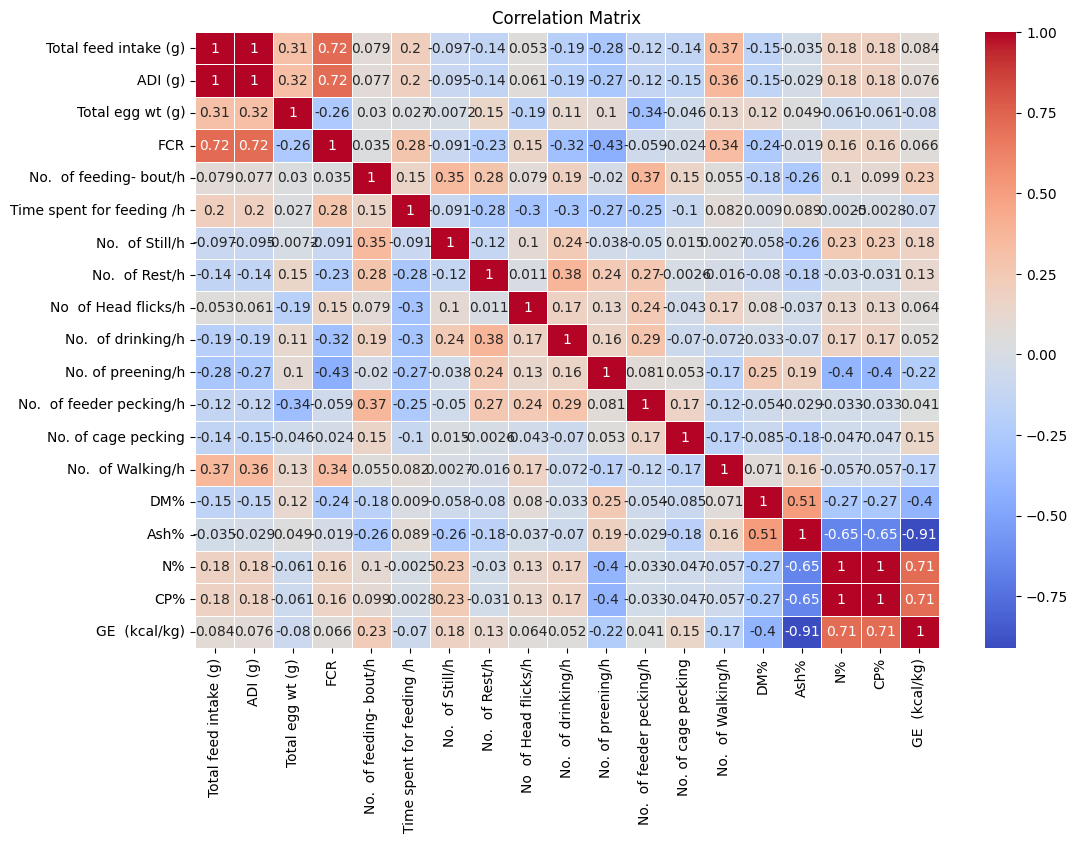

In [177]:
# Select only the numerical features for the correlation matrix
numerical_features = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
corr_matrix = numerical_features.corr()
# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 5.3.2 Identify Highly Correlated Features  
To avoid multicollinearity, highly correlated features (correlation > 0.9) should be identified and considered for removal.  

**Steps:**  

- **Extract the Upper Triangle:** The upper triangle of the correlation matrix is selected to focus on unique feature pairs.  

    ```python
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    ```

- **Identify Highly Correlated Features:** Any feature with a correlation greater than 0.9 is flagged.  

    ```python
    high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
    ```

This helps ensure only one feature from highly correlated pairs is retained to improve model performance and avoid redundancy.


In [178]:
# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.9
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print(f"Highly correlated features (correlation > 0.9): {high_corr_features}")

Highly correlated features (correlation > 0.9): ['ADI (g)', 'CP%']


### 5.3.3 Drop Highly Correlated Features  
Features that are highly correlated with others are dropped to reduce redundancy in the dataset and improve model performance.

**Steps:**  

- **Identify Features to Drop:** Based on the previous correlation analysis, the most redundant features are selected for removal.  

    `high_corr_features_to_remove = ['Ash%','GE  (kcal/kg)','ADI (g)','CP%','Total feed intake (g)']`

- **Drop the Features:** These highly correlated features are dropped from the dataset.  

    `numerical_features = numerical_features.drop(columns=high_corr_features_to_remove)`
    

- **Recalculate the Correlation Matrix:** After dropping the selected features, the correlation matrix is recalculated to ensure redundancy is reduced.  

    `corr_matrix_reduced = numerical_features.corr()`
    

- **Visualize the Updated Correlation Matrix:** A new heatmap is generated to visualize the cleaned-up correlations.  

    - `plt.figure(figsize=(12, 8))`
    - `sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', linewidths=0.5)`
    - `plt.title('Updated Correlation Matrix')`
    - `plt.show()`
This final step ensures the remaining features are less correlated, improving model stability and interpretability.


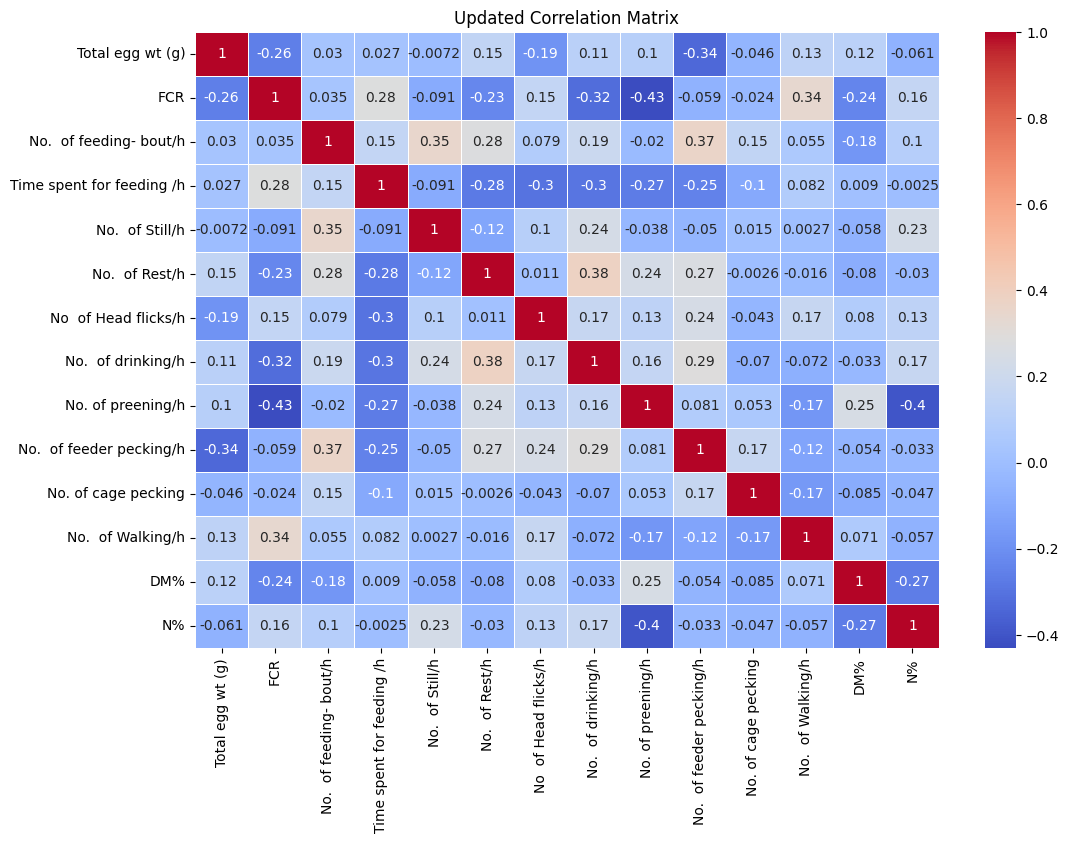

In [179]:
# Select only the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
# Drop the highly correlated features
high_corr_features = ['Ash%','GE  (kcal/kg)','ADI (g)','CP%','Total feed intake (g)']
numerical_features = numerical_features.drop(columns=high_corr_features)
# Recalculate the correlation matrix
corr_matrix_reduced = numerical_features.corr()
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Updated Correlation Matrix')
plt.show()


---

# 6. Feature Engineering  
- Feature engineering involves creating new features or modifying existing ones to improve model performance. The following steps are taken  

- Handling Infinite Values: Replace infinite values with NaN.  
`df.replace([np.inf, -np.inf], np.nan, inplace=True)`

- Cleaning Data: Remove rows with zero values that may cause issues.  
`df = df[(df['Time spent for feeding /h'] != 0) & (df['Total egg wt (g)'] != 0) & (df['Time spent for feeding /h'] != 0)]`

- Creating New Features: Derived features are computed to capture additional insights:  

  - Drinking/Feeding Ratio: Ratio of drinking to feeding time.  
  - Preening/Feeding Ratio: Ratio of preening to feeding time.  
  - Feed Efficiency Score: Total feed intake divided by total egg weight.  
  - Feeding Intensity: Time spent feeding divided by the number of rest hours.  
  - Activity Ratio: Sum of various activities divided by feeding time.  
  - Combined Feed Intake: Sum of average daily intake and total feed intake.  

- `df['Drinking/Feeding Ratio'] = df['No.  of drinking/h'] / df['Time spent for feeding /h']`
- `df['Preening/Feeding Ratio'] = df['No.  of preening/h'] / df['Time spent for feeding /h']`
- `df['Feed Efficiency Score'] = df['Total feed intake (g)'] / df['Total egg wt (g)']`
- `df['Feeding Intensity'] = df['Time spent for feeding /h'] / df["No.  of Rest/h"]`
- `df['Activity Ratio'] = (df['No.  of feeder pecking/h'] + df['No.  of drinking/h'] + df['No.  of preening/h'] + df['No.  of Walking/h']) / df['Time spent for feeding /h']`
- `df['Combined_Feed_Intake'] = df['ADI (g)'] + df['Total feed intake (g)']`


In [180]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Check for rows where zero values may cause issues and handle them
df = df[(df['Time spent for feeding /h'] != 0) & (df['Total egg wt (g)'] != 0) & (df['Time spent for feeding /h'] != 0)]
# Recompute the derived features after cleaning data
df['Drinking/Feeding Ratio'] = df['No.  of drinking/h'] / df['Time spent for feeding /h']
df['Preening/Feeding Ratio'] = df['No. of preening/h'] / df['Time spent for feeding /h']
df['Feed Efficiency Score'] = df['Total feed intake (g)'] / df['Total egg wt (g)']
df['Feeding Intensity'] = df['Time spent for feeding /h'] / df["No.  of Rest/h"]
df['Activity Ratio'] = (df['No.  of feeder pecking/h'] + df['No.  of drinking/h'] + df['No. of preening/h'] + df['No.  of Walking/h']) / df['Time spent for feeding /h']
df['Combined_Feed_Intake'] = df['ADI (g)'] + df['Total feed intake (g)']
# Check the new statistics
print(df[['Drinking/Feeding Ratio', 'Preening/Feeding Ratio', 'Feed Efficiency Score', 
          'Feeding Intensity','Combined_Feed_Intake','Activity Ratio']].describe())


       Drinking/Feeding Ratio  Preening/Feeding Ratio  Feed Efficiency Score  \
count               67.000000               67.000000              67.000000   
mean                 0.219853                0.869883               2.023451   
std                  0.282402                0.747816               0.304253   
min                  0.018519                0.185185               1.483607   
25%                  0.033333                0.400000               1.842806   
50%                  0.111111                0.633333               1.951648   
75%                  0.267857                1.027778               2.169827   
max                  1.000000                3.500000               3.838565   

       Feeding Intensity  Combined_Feed_Intake  Activity Ratio  
count          67.000000             67.000000       67.000000  
mean           18.679104           1026.341151        2.686442  
std            16.237513            103.291723        2.763660  
min             0.5

---

# 7. Outlier Removal
- A function is defined to remove outliers based on the interquartile range (IQR).

       `def remove_outliers(df, columns, factor=1.5)`
### Implementation
`df_cleaned = remove_outliers(df, continuous_columns)`

In [181]:
continuous_columns = [ 'Drinking/Feeding Ratio', 'Preening/Feeding Ratio', 'Feed Efficiency Score', 'Feeding Intensity', 'Activity Ratio']
def remove_outliers(df, columns, factor=1.5):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        # Filter the dataset to include only rows within the IQR range
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned
    # Remove outliers
df_cleaned = remove_outliers(df, continuous_columns)


### 7.1 Save the updated dataset after feature engineering

In [182]:
desktop_path = r"C:\PROJECT4.2\Updated_dataset.csv"
df.to_csv(desktop_path, index=False)
print(f"Dataset saved to Desktop as 'Updated_dataset.csv'")


Dataset saved to Desktop as 'Updated_dataset.csv'


# 8. Calculate the correlation matrix of Target variable (FCR) with with engineered features

In [183]:
# Load the dataset
df = pd.read_csv("C:/Users/Silas Ochieng/Desktop/datasets/Updated_dataset.csv")

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations with FCR
corr_matrix = numerical_df.corr()
fcr_corr = corr_matrix["FCR"].sort_values(ascending=False)

# Display the top correlated features with FCR
print("Top features correlated with FCR:")
print(fcr_corr)


Top features correlated with FCR:
FCR                          1.000000
Total feed intake (g)        0.725955
ADI (g)                      0.721912
Feed Efficiency Score        0.626399
No.  of Walking/h            0.332554
Time spent for feeding /h    0.307114
Feeding Intensity            0.298183
N%                           0.160797
CP%                          0.160365
No  of Head flicks/h         0.160320
GE  (kcal/kg)                0.066921
No.  of feeding- bout/h      0.043505
Ash%                        -0.020002
No. of cage pecking         -0.037417
No.  of feeder pecking/h    -0.061153
No.  of Still/h             -0.088828
DM%                         -0.233439
No.  of Rest/h              -0.234685
Activity Ratio              -0.238541
Total egg wt (g)            -0.253501
No.  of drinking/h          -0.317935
Drinking/Feeding Ratio      -0.328842
Preening/Feeding Ratio      -0.355169
No. of preening/h           -0.427503
Name: FCR, dtype: float64


---

# 9. Feature Selection  

Feature selection is a crucial step in the machine learning pipeline, particularly in predictive modeling. It involves selecting a subset of relevant features (variables, predictors) for use in model construction. The goal is to improve model performance, reduce overfitting, and enhance interpretability.  

In the context of the predictive model for **Feed Conversion Ratio (FCR)** using a **Random Forest Regressor**, the following features are selected :  

- **Feeding Intensity:** Represents the ratio of time spent feeding to the number of rest per hour.  
- **Total Feed Intake (g):** The total amount of feed consumed by the birds.  
- **No. of Feeding Bouts/h:** The frequency of feeding events per hour.  
- **No. of Head Flicks/h:** Indicates the number of head movements per hour, which may relate to feeding behavior.  
- **No. of Drinking Events/h:** The frequency of drinking events per hour.  
- **No. of Preening Events/h:** The frequency of preening behavior per hour.  
- **No. of Feeder Pecking Events/h:** The frequency of pecking at the feeder per hour.    
- **No. of Walking Events/h:** The frequency of walking behavior per hour.  
- **GE (kcal/kg):** Gross energy content of the feed.  
- **N%:** Nitrogen percentage in the feed.  

### Implementation  

The selected features are used to create the feature matrix (`X`) and the target variable (`y`) for the model:  

```python
X = df[selected_features]
y = df['FCR']


In [184]:
selected_features = ['Feeding Intensity', 'Total feed intake (g)','No.  of feeding- bout/h','No  of Head flicks/h','No.  of drinking/h','No. of preening/h',
                     'No.  of feeder pecking/h','No.  of Walking/h','GE  (kcal/kg)','N%']
X = df[selected_features]
y = df['FCR'] 

---

# 10. Train-Test Split  

The dataset is split into **training** and **testing** sets to evaluate the model's performance. This ensures the model learns from one portion of the data (training set) and is evaluated on unseen data (testing set) to assess its generalization ability.  

The split is typically done using an 80/20 ratio — 80% for training and 20% for testing — with a fixed random state for reproducibility:  

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

# 11. Model Training  

The next step is to train a **Random Forest Regressor** using the selected features. Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and prevent overfitting.  

The model is initialized with 100 decision trees (`n_estimators=100`) and a fixed random state (`random_state=40`) for reproducibility. Then, it's trained on the training data (`X_train` and `y_train`):  

 - `rf_selected = RandomForestRegressor(n_estimators=100, random_state=40)`
 - `rf_selected.fit(X_train, y_train)`


In [186]:
# Train model with selected features
rf_selected = RandomForestRegressor(n_estimators=100, random_state=40)
rf_selected.fit(X_train, y_train)

RandomForestRegressor(random_state=40)

In [187]:
# Make predictions
y_pred_selected = rf_selected.predict(X_test)

## 11.1 Model Evaluation  

- After training, the model's performance is assessed using standard regression metrics. 
- These metrics provide insights into how well the model predicts the target variable (`FCR`) on the unseen test data:

 - `mae_selected = mean_absolute_error(y_test, y_pred_selected)`
 - `mse_selected = mean_squared_error(y_test, y_pred_selected)`
 - `r2_selected = r2_score(y_test, y_pred_selected)`


In [188]:
mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(" MAE (selected features):", mae_selected)
print(" MSE (selected features):", mse_selected)
print(" R² Score (selected features):", r2_selected)

 MAE (selected features): 0.05559074654857137
 MSE (selected features): 0.004667683883349603
 R² Score (selected features): 0.8568807955125473


---

## 11.2 Feature Importance  

- Understanding which features contribute most to the model’s predictions is crucial for interpretability and refining the model. The Random Forest Regressor provides a straightforward way to extract feature importance values after training.
- The importance of each feature is extracted from the trained model, allowing for insights into which features contribute most to the prediction of FCR:

     - `feature_importances = rf_selected.feature_importances_`


In [189]:
# Extract feature importances
feature_importances = rf_selected.feature_importances_
# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
# Display the sorted DataFrame
print(importance_df)

                    Feature  Importance
0     Total feed intake (g)    0.577469
1         No. of preening/h    0.118463
2             GE  (kcal/kg)    0.057192
3         Feeding Intensity    0.051729
4      No  of Head flicks/h    0.042513
5         No.  of Walking/h    0.037814
6   No.  of feeding- bout/h    0.031656
7        No.  of drinking/h    0.030432
8                        N%    0.030202
9  No.  of feeder pecking/h    0.022529


# 12. Visualizing the results

### Predicted vs. Actual FCR Visualization  

To assess the model's performance visually, a scatter plot is created comparing the predicted FCR values to the actual values. This helps evaluate how closely the predictions align with reality.

In [190]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred_selected, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. FCR'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual FCR',
    xaxis_title='Actual FCR',
    yaxis_title='Predicted FCR'
)
fig.show()

### Breakdown of the visualization:

- **Blue Scatter Points**: Represent the predicted FCR values against the actual ones. Ideally, these points should cluster along the diagonal line.  
- **Red Line**: This line represents the ideal prediction scenario (`y = x`), where predictions exactly match actual values. The closer the points are to this line, the better the model performed.  
- **Title and Axis Labels**: Ensure clear communication of what the plot represents.  

---

 # 13. Save model for Flask
 - The trained model is saved for future use in a Flask application.

In [191]:
# Save model for Flask
joblib.dump(rf_selected, 'model.pkl')
print("Model saved as model.pkl")

Model saved as model.pkl


In [192]:
print("Model expects:", rf_selected.feature_names_in_)
print("Input columns:", df.columns)

Model expects: ['Feeding Intensity' 'Total feed intake (g)' 'No.  of feeding- bout/h'
 'No  of Head flicks/h' 'No.  of drinking/h' 'No. of preening/h'
 'No.  of feeder pecking/h' 'No.  of Walking/h' 'GE  (kcal/kg)' 'N%']
Input columns: Index(['Bird ID.', 'Total feed intake (g)', 'ADI (g)', 'Total egg wt (g)',
       'FCR', 'No.  of feeding- bout/h', 'Time spent for feeding /h',
       'No.  of Still/h', 'No.  of Rest/h', 'No  of Head flicks/h',
       'No.  of drinking/h', 'No. of preening/h', 'No.  of feeder pecking/h',
       'No. of cage pecking', 'No.  of Walking/h', 'DM%', 'Ash%', 'N%', 'CP%',
       'GE  (kcal/kg)', 'Drinking/Feeding Ratio', 'Preening/Feeding Ratio',
       'Feed Efficiency Score', 'Feeding Intensity', 'Activity Ratio'],
      dtype='object')
